In [212]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import tensorflow as tf
from sklearn import preprocessing

In [213]:
X = np.random.uniform(0,1,20)
X


array([0.69742877, 0.45354268, 0.7220556 , 0.86638233, 0.97552151,
       0.85580334, 0.01171408, 0.35997806, 0.72999056, 0.17162968,
       0.52103661, 0.05433799, 0.19999652, 0.01852179, 0.7936977 ,
       0.22392469, 0.34535168, 0.92808129, 0.7044144 , 0.03183893])

In [214]:
mean = 0
s_d = 1
N = np.random.normal(mean, s_d, 20)
N

array([ 0.39600671, -1.09306151, -1.49125759,  0.4393917 ,  0.1666735 ,
        0.63503144,  2.38314477,  0.94447949, -0.91282223,  1.11701629,
       -1.31590741, -0.4615846 , -0.06824161,  1.71334272, -0.74475482,
       -0.82643854, -0.09845252, -0.66347829,  1.12663592, -1.07993151])

[-0.90633963  0.17846616 -1.13375118 -0.70039991 -0.13652991 -0.72354814
  0.3118498   0.86504904 -1.08338949  0.99289523 -0.2633831   0.28866291
  0.94422561  0.28744763 -1.03701986  0.90396502  0.81599128 -0.50300414
 -0.84659707  0.09072508]
[0.69742877 0.45354268 0.7220556  0.86638233 0.97552151 0.85580334
 0.01171408 0.35997806 0.72999056 0.17162968 0.52103661 0.05433799
 0.19999652 0.01852179 0.7936977  0.22392469 0.34535168 0.92808129
 0.7044144  0.03183893]


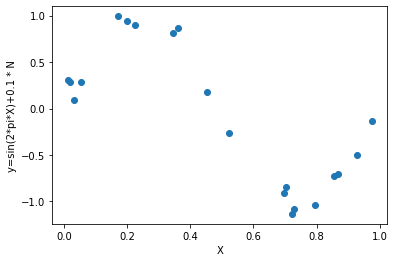

In [215]:
y=np.sin(2*np.pi*X)+(0.1 * N)
print(y)
print(X)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1 * N')
plt.show()


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

d= {"X_train":X_train, "Y_train":y_train, "X_test":X_test, "y_test":y_test}
df = pd.DataFrame(d)
df

[0.01852179 0.69742877 0.7220556  0.34535168 0.7044144  0.85580334
 0.7936977  0.17162968 0.92808129 0.05433799]
[0.52103661 0.86638233 0.35997806 0.22392469 0.97552151 0.19999652
 0.72999056 0.01171408 0.03183893 0.45354268]
[ 0.28744763 -0.90633963 -1.13375118  0.81599128 -0.84659707 -0.72354814
 -1.03701986  0.99289523 -0.50300414  0.28866291]
[-0.2633831  -0.70039991  0.86504904  0.90396502 -0.13652991  0.94422561
 -1.08338949  0.3118498   0.09072508  0.17846616]


,X_train,Y_train,X_test,y_test
0,0.018522,0.287448,0.521037,-0.263383
1,0.697429,-0.906340,0.866382,-0.700400
2,0.722056,-1.133751,0.359978,0.865049
3,0.345352,0.815991,0.223925,0.903965
4,0.704414,-0.846597,0.975522,-0.136530
5,0.855803,-0.723548,0.199997,0.944226
6,0.793698,-1.037020,0.729991,-1.083389
7,0.171630,0.992895,0.011714,0.311850
8,0.928081,-0.503004,0.031839,0.090725
9,0.054338,0.288663,0.453543,0.178466


In [217]:
x = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

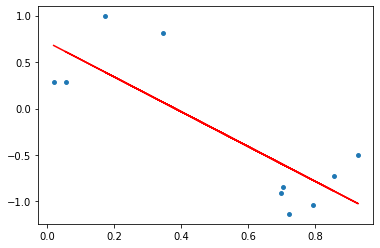

In [218]:
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='r')
plt.show()

RMSE: 0.7568673803803481
R2: 0.0
weights:
[[0.]]


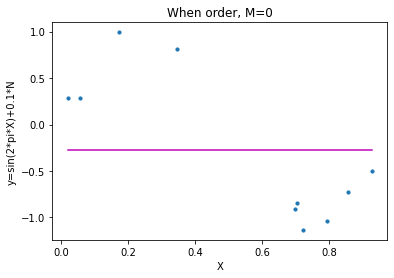

In [219]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=0)
x_poly = polynomial_features.fit_transform(x)

model0 = LinearRegression()
model0.fit(x_poly, y)
y_poly_pred = model0.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print('weights:')
print(model0.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=0')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 0.7519495764684473
R2: 0.012952935044441616
[[0.         0.26213059]]


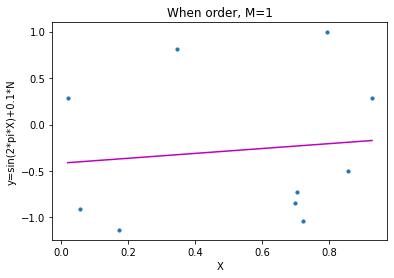

In [220]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)

model1 = LinearRegression()
model1.fit(x_poly, y)
y_poly_pred = model1.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model1.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=1')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 0.7283817143058953
R2: 0.07385605370383574
[[  0.           3.21901059 -10.25044715   8.242606  ]]


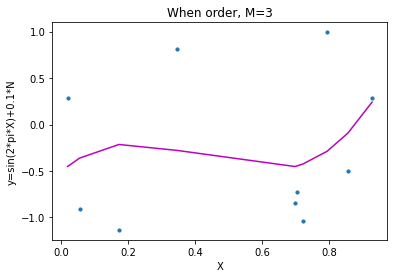

In [221]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model3 = LinearRegression()
model3.fit(x_poly, y)
y_poly_pred = model3.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model3.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=3')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 3.293032746314301e-09
R2: 1.0
[[ 0.00000000e+00  1.32692953e+04 -3.30920990e+05  3.30202547e+06
  -1.64538690e+07  4.59456371e+07 -7.55195929e+07  7.27111367e+07
  -3.80009362e+07  8.33425479e+06]]


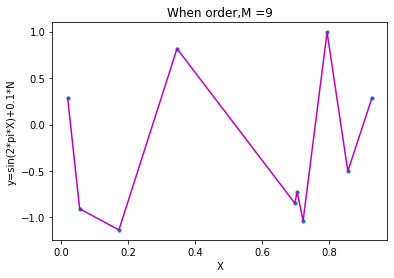

In [222]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)

model9 = LinearRegression()
model9.fit(x_poly, y)
y_poly_pred = model9.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model9.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

In [223]:
print(model0.coef_)
print(model1.coef_)
print(model3.coef_)
print(model9.coef_)

[[0.]]
[[0.         0.26213059]]
[[  0.           3.21901059 -10.25044715   8.242606  ]]
[[ 0.00000000e+00  1.32692953e+04 -3.30920990e+05  3.30202547e+06
  -1.64538690e+07  4.59456371e+07 -7.55195929e+07  7.27111367e+07
  -3.80009362e+07  8.33425479e+06]]


In [224]:
data = {'M=0':[model0.coef_[0][0],"","","","","","","","","" ],'M=1':[model1.coef_[0][0],model1.coef_[0][1],"","","","","","","",""],'M=3':[model3.coef_[0][0],model3.coef_[0][1],model3.coef_[0][2],model3.coef_[0][3],"","","","","",""],'M=9':[ model9.coef_[0][0],model9.coef_[0][1],model9.coef_[0][2],model9.coef_[0][3],model9.coef_[0][4], model9.coef_[0][5],model9.coef_[0][6],model9.coef_[0][7],model9.coef_[0][8],model9.coef_[0][9]]}
print(data)

df.w = pd.DataFrame(data, index =['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

df.w

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, 0.2621305870723769, '', '', '', '', '', '', '', ''], 'M=3': [0.0, 3.2190105913245035, -10.250447148423282, 8.242606003316299, '', '', '', '', '', ''], 'M=9': [0.0, 13269.295276771692, -330920.9898885624, 3302025.4666005145, -16453868.962149223, 45945637.10364015, -75519592.88080426, 72711136.69308563, -38000936.15774952, 8334254.786580411]}


<ipython-input-224-73fd4715cac2>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.w = pd.DataFrame(data, index =['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])


,M=0,M=1,M=3,M=9
w0,0.0,0.0,0.0,0.000000e+00
w1,,0.262131,3.219011,1.326930e+04
w2,,,-10.250447,-3.309210e+05
w3,,,8.242606,3.302025e+06
w4,,,,-1.645387e+07
w5,,,,4.594564e+07
w6,,,,-7.551959e+07
w7,,,,7.271114e+07
w8,,,,-3.800094e+07
w9,,,,8.334255e+06


In [225]:
train_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    train_rmse.append(rmse)


RMSE: 0.7568673803803481
RMSE: 0.7519495764684473
RMSE: 0.7439719235946133
RMSE: 0.7283817143058953
RMSE: 0.6510304970637747
RMSE: 0.4648330633171022
RMSE: 0.4538652431486828
RMSE: 0.2662292684513589
RMSE: 0.06687137848310841
RMSE: 3.293032746314301e-09


In [226]:
x = X_test[:, np.newaxis]
y = y_test[:, np.newaxis]

In [227]:
test_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    test_rmse.append(rmse)

RMSE: 0.6498708787928923
RMSE: 0.4899201014657189
RMSE: 0.4812508740977651
RMSE: 0.13673726879766038
RMSE: 0.13627731441828975
RMSE: 0.06728137378573901
RMSE: 0.040950751810797985
RMSE: 0.03696364085772111
RMSE: 0.03680116801585467
RMSE: 1.5275971105117497e-11


In [228]:
# intialise data of lists.
data1 = {'M':[0,1,2,3,4,5,6,7,8,9],'Train.RMSE':train_rmse,'Test.RMSE':test_rmse}
print(data)
# Creates pandas DataFrame.
df1 = pd.DataFrame(data1)

# print the data
df1

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, 0.2621305870723769, '', '', '', '', '', '', '', ''], 'M=3': [0.0, 3.2190105913245035, -10.250447148423282, 8.242606003316299, '', '', '', '', '', ''], 'M=9': [0.0, 13269.295276771692, -330920.9898885624, 3302025.4666005145, -16453868.962149223, 45945637.10364015, -75519592.88080426, 72711136.69308563, -38000936.15774952, 8334254.786580411]}


,M,Train.RMSE,Test.RMSE
0,0,7.568674e-01,6.498709e-01
1,1,7.519496e-01,4.899201e-01
2,2,7.439719e-01,4.812509e-01
3,3,7.283817e-01,1.367373e-01
4,4,6.510305e-01,1.362773e-01
5,5,4.648331e-01,6.728137e-02
6,6,4.538652e-01,4.095075e-02
7,7,2.662293e-01,3.696364e-02
8,8,6.687138e-02,3.680117e-02
9,9,3.293033e-09,1.527597e-11


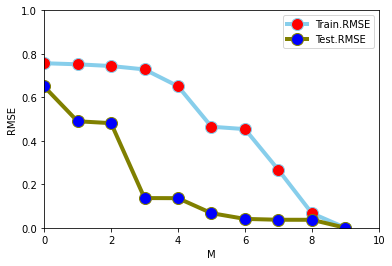

In [229]:
plt.plot( 'M', 'Train.RMSE', data=df1, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'M', 'Test.RMSE', data=df1, marker='o',markerfacecolor='blue',markersize=12, color='olive', linewidth=4)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('M')
plt.ylim((0,1))
plt.xlim((0,10))
plt.show()

In [230]:
np.random.seed(100)
X2 = np.random.uniform(0,1,100)
print(X2)
mean, s_d = 0, 1 # mean and standard deviation
N = np.random.normal(mean, s_d, 100)
print(N)
import matplotlib.pyplot as plt
y2=np.sin(2*np.pi*X2)+(0.1 * N)
print(y2)
print(X2)

[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333 0.89132195 0.20920212
 0.18532822 0.10837689 0.21969749 0.97862378 0.81168315 0.17194101
 0.81622475 0.27407375 0.43170418 0.94002982 0.81764938 0.33611195
 0.17541045 0.37283205 0.00568851 0.25242635 0.79566251 0.01525497
 0.59884338 0.60380454 0.10514769 0.38194344 0.03647606 0.89041156
 0.98092086 0.05994199 0.89054594 0.5769015  0.74247969 0.63018394
 0.58184219 0.02043913 0.21002658 0.54468488 0.76911517 0.25069523
 0.28589569 0.85239509 0.97500649 0.88485329 0.35950784 0.59885895
 0.35479561 0.34019022 0.17808099 0.23769421 0.04486228 0.50543143
 0.37625245 0.5928054  0.62994188 0.14260031 0.9338413  0.94637988
 0.60229666 0.38776628 0.363188   0.20434528 0.27676506 0.24653588
 0.173608   0.96660969 0.9570126  0.59797368 0.73130075 0.34038522
 0.0920556  0.46349802 0.50869889 0.08846017 0.52803522 0.99215804
 0.39503593 0.33559644 0.80545054 0.75434899 0.31306644 0.6340

RMSE: 0.10422445080258333
R2: 0.9788493340784026


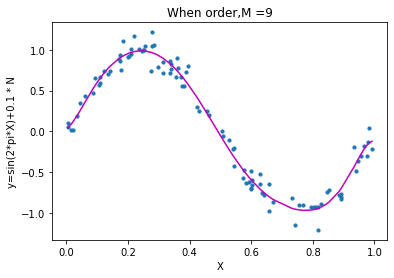

In [231]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x2_poly = polynomial_features.fit_transform(X2.reshape(100,1))

# transforming the data to include another axis
x2 = X2[:, np.newaxis]
y2= y2[:, np.newaxis]

model = LinearRegression()
model.fit(x2_poly, y2)
y2_poly_pred = model.predict(x2_poly)

rmse = np.sqrt(mean_squared_error(y2,y2_poly_pred))
r2 = r2_score(y2,y2_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_poly_pred), key=sort_axis)
x2, y2_poly_pred = zip(*sorted_zip)
plt.plot(x2, y2_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1 * N')
plt.show()

In [232]:
def regularizeRidge(alpha):
    if alpha < 0: alpha = math.exp(alpha)
    else:
        print("alpha = ",alpha)
        if alpha != 0: print("ln(alpha) = ", math.log(alpha))
    polynomial_features= PolynomialFeatures(degree=9)
    x_transformed =  polynomial_features.fit_transform(X2.reshape(100,1))
    poly_linear_model = Ridge(alpha = alpha)
    poly_linear_model.fit(x_transformed, y2)
    return poly_linear_model

def chartRidge(alpha):
    model = regularizeRidge(alpha)
    xx = np.linspace(0, 1, 100)
    x_transformed =polynomial_features.fit_transform(xx.reshape(100,1))
    yy = model.predict(x_transformed)
    plt.plot(xx, yy,label=alpha)
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, c = 'r')
    plt.legend()

alpha =  1
ln(alpha) =  0.0


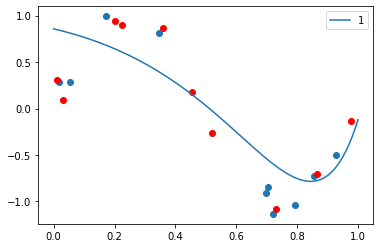

In [233]:
chartRidge(1)

alpha =  0.1
ln(alpha) =  -2.3025850929940455


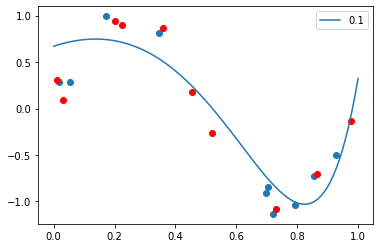

In [234]:
chartRidge(0.1)

alpha =  0.01
ln(alpha) =  -4.605170185988091


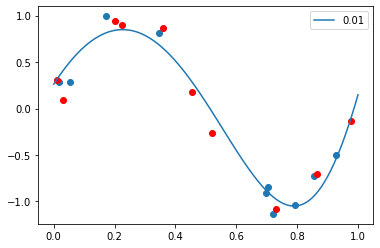

In [235]:
chartRidge(0.01)

alpha =  0.001
ln(alpha) =  -6.907755278982137


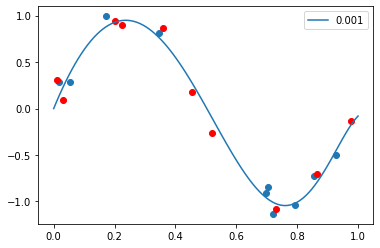

In [236]:
chartRidge(0.001)

alpha =  0.0001
ln(alpha) =  -9.210340371976182


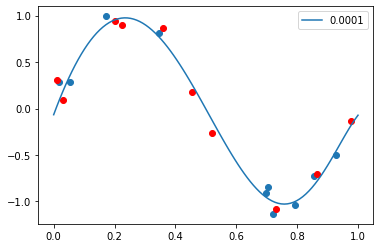

In [237]:
chartRidge(0.0001)

alpha =  1e-05
ln(alpha) =  -11.512925464970229


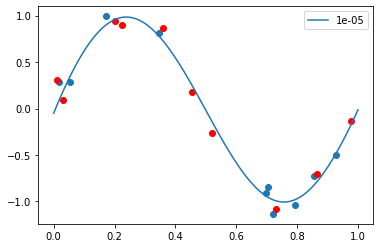

In [238]:
chartRidge(0.00001)

In [239]:
def getMse(Y, yy):
    standard = tf.square(Y - yy)
    mse = tf.reduce_mean(standard)
    return mse.numpy()


train_error_ridge = np.zeros(30)
test_error_ridge = np.zeros(30)

def getErrorRidge(i:int,  model) :     # A new error function
    xx_transformed_test = polynomial_features.fit_transform(X_test.reshape(X_test.shape[0], 1))
    xx_transformed_train = polynomial_features.fit_transform(X_train.reshape(X_train.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)
    test_error_ridge[i] = getMse(y_test, yy_test)
    train_error_ridge[i] = getMse(y_train, yy_train)

In [240]:
xx = list(range(-30, 0))
for i in xx:
    model = regularizeRidge(i)
    getErrorRidge(i, model)

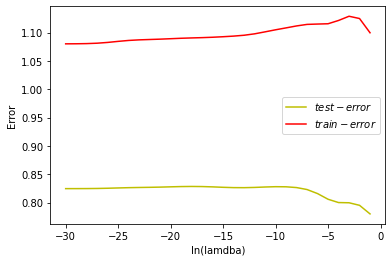

In [241]:
xx = list(range(-30, 0))
plt.plot(xx, test_error_ridge, label = "$test-error$", c = 'y')
plt.plot(xx, train_error_ridge, label = "$train-error$", c = 'r')

plt.xlabel('ln(lamdba)')

plt.ylabel('Error')
plt.legend()

In [243]:
best_lambda = 0
for i in range(-30,0):
    if test_error_ridge[i+30] == test_error_ridge.min(): best_lambda = i
print("best ln(lambda)based on my analysis = ", best_lambda)
best_lambda_0 = math.exp(best_lambda)
print("best lambda = ", best_lambda_0)
print("In Conclusion of this analysis, the model with input ln(lamdba) = ",best_lambda,", lambda = ",best_lambda_0," will provide best test performance.")

best ln(lambda)based on my analysis =  -1
best lambda =  0.36787944117144233
In Conclusion of this analysis, the model with input ln(lamdba) =  -1 , lambda =  0.36787944117144233  will provide best test performance.
